In [1]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
classifier.add(Convolution2D(64, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
#classifier.add(Convolution2D(128, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0724 20:12:36.106308 50856 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  
W0724 20:12:36.161593 50856 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 20:12:36.163625 50856 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 20:12:36.173597 50856 deprecation_wrapper.py:119] 

In [3]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 207 images belonging to 26 classes.
Found 97 images belonging to 26 classes.


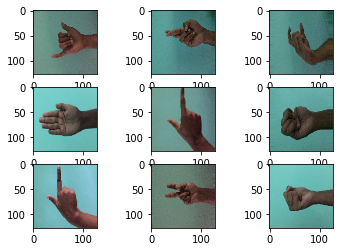

In [4]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [5]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 100,
        epochs = 6,
        validation_data = test_set,
        validation_steps = 10)

W0724 20:13:00.411578 50856 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 20:13:00.462455 50856 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/6
100/100 [==============================] - 187s 2s/step - loss: 1.6914 - acc: 0.5239 - val_loss: 1.0266 - val_acc: 0.6744
Epoch 2/6
100/100 [==============================] - 188s 2s/step - loss: 0.1665 - acc: 0.9517 - val_loss: 1.0040 - val_acc: 0.7709
Epoch 3/6
100/100 [==============================] - 188s 2s/step - loss: 0.0512 - acc: 0.9816 - val_loss: 1.0193 - val_acc: 0.7364
Epoch 4/6
100/100 [==============================] - 189s 2s/step - loss: 0.0419 - acc: 0.9893 - val_loss: 1.1412 - val_acc: 0.7665
Epoch 5/6
100/100 [==============================] - 251s 3s/step - loss: 0.0285 - acc: 0.9937 - val_loss: 1.0343 - val_acc: 0.7984
Epoch 6/6
100/100 [==============================] - 347s 3s/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.9783 - val_acc: 0.7665
